In [3]:
import numpy as np
random_baselines = np.random.uniform(size=(100, 2), low=(1/400), high=1/10)

In [6]:
random_baselines.shape

(100, 2)

In [10]:
np.savetxt('random_baselines.csv', random_baselines, header= 'U, V', delimiter=',')

## Generate test images

In [11]:
im = np.zeros(shape=(500, 500))
im[237, 238] = 5.

In [12]:
import matplotlib.pyplot as plt

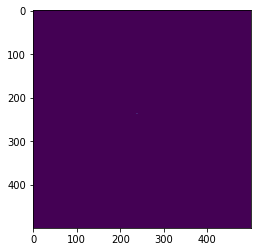

In [13]:
plt.imshow(im)

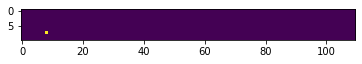

In [14]:
plt.imshow(im[230:240, 230:340])

In [17]:
from scipy import ndimage

In [18]:
im_conv = ndimage.gaussian_filter(im, sigma=8./2.355)

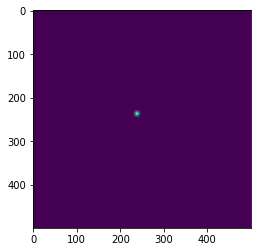

In [19]:
plt.imshow(im_conv)

In [21]:
np.save('../test-data/point.npy', im)